In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
df['class']=le.fit_transform(df['class'])

In [9]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [10]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [11]:
df['habitat']=le.fit_transform(df['habitat'])

In [12]:
df['habitat'].value_counts()

0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64

In [13]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [14]:

from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe=OneHotEncoder()

In [16]:
ohe_results=ohe.fit_transform(df[['cap-surface']])
pd.DataFrame(ohe_results.toarray(),columns=ohe.categories_).head()

f    g    s    y
0  0.0  0.0  1.0  0.0
1  0.0  0.0  1.0  0.0
2  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  1.0
4  0.0  0.0  1.0  0.0

In [17]:
df=df.join(pd.DataFrame(ohe_results.toarray(),columns=ohe.categories_))

In [18]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... veil-color ring-number ring-type  \
0            c         n          k  ...          w           o         p   
1            c         b          k  ...          w           o         p   
2            c         b          n  ...          w           o         p   
3            c         n          n  ...          w           o         p   
4            w         b          k  ...          w           o         e   

  spore-print-color population habitat (f,) (g,) (s,) (y,)  
0                 k          s       5  0.0  0.0  1.0  0.0  
1                 n          n       1  0.0  0.0  1.0  0.0  
2                 n          n       3  0.0  0.0  1.0  0.0  
3                 k          s       5  0.0  0.0  0.0  1.0  
4                 n          a       1  0.0  0.0  1.0  0.0  

[5 rows x 27 columns]

In [19]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      1         x           s         n       t    p               f   
1      0         x           s         y       t    a               f   
2      0         b           s         w       t    l               f   
3      1         x           y         w       t    p               f   
4      0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... veil-color ring-number ring-type  \
0            c         n          k  ...          w           o         p   
1            c         b          k  ...          w           o         p   
2            c         b          n  ...          w           o         p   
3            c         n          n  ...          w           o         p   
4            w         b          k  ...          w           o         e   

  spore-print-color population habitat (f,) (g,) (s,) (y,)  
0                 k          s       5  0.0  0.0  1.0  0.0  
1                 n          n       1  0.0  0.0  1.0  0.0  
2                 n          n       3  0.0  0.0  1.0  0.0  
3                 k          s       5  0.0  0.0  0.0  1.0  
4                 n          a       1  0.0  0.0  1.0  0.0  

[5 rows x 27 columns]

In [20]:
df['bruises'].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

In [21]:
df['bruises']=le.fit_transform(df['bruises'])

In [22]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [23]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [24]:
df['cap-shape']=le.fit_transform(df['cap-shape'])
df['cap-shape'].value_counts()


5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64

In [25]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [35]:
df['odor'].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [37]:
df['odor']=le.fit_transform(df['odor'])

In [38]:
df['odor'].value_counts()

5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64

In [36]:
df['gill-spacing'].value_counts()

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [39]:
df['gill-spacing']=le.fit_transform(df['gill-spacing'])

In [40]:
df['gill-spacing'].value_counts()

0    6812
1    1312
Name: gill-spacing, dtype: int64

In [42]:
#ohe_ring-number=ohe.fit_transform(df[['ring-number']])
#ohe_results=ohe.fit_transform(df[['cap-surface']])
#pd.DataFrame(ohe_results.toarray(),columns=ohe.categories_).head()


SyntaxError: cannot assign to operator (<ipython-input-42-04eae09529fb>, line 1)

In [33]:
pd.DataFrame(ohe_odor.toarray(),columns=ohe.categories_).head()

a    c    f    l    m    n    p    s    y
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

In [34]:
#df=df.join(pd.DataFrame(ohe_results.toarray(),columns=ohe.))
df=df.join(pd.DataFrame(ohe_odor.toarray(), columns=ohe.categories_))

ValueError: columns overlap but no suffix specified: Index([('f',), ('s',), ('y',)], dtype='object')

In [43]:
df['ring-type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [44]:
df['ring-type']=le.fit_transform(df['ring-type'])

In [45]:
df['ring-type'].value_counts()

4    3968
0    2776
2    1296
1      48
3      36
Name: ring-type, dtype: int64

In [55]:
df.head()

class  cap-shape cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5           s          4        1     6                1   
1      0          5           s          9        1     0                1   
2      0          0           s          8        1     3                1   
3      1          5           y          8        1     6                1   
4      0          5           s          3        0     5                1   

   gill-spacing gill-size gill-color  ... veil-color ring-number ring-type  \
0             0         n          k  ...          w           o         4   
1             0         b          k  ...          w           o         4   
2             0         b          n  ...          w           o         4   
3             0         n          n  ...          w           o         4   
4             1         b          k  ...          w           o         0   

  spore-print-color population habitat (f,) (g,) (s,)  (y,)  
0                 k          s       5  0.0  0.0  1.0   0.0  
1                 n          n       1  0.0  0.0  1.0   0.0  
2                 n          n       3  0.0  0.0  1.0   0.0  
3                 k          s       5  0.0  0.0  0.0   1.0  
4                 n          a       1  0.0  0.0  1.0   0.0  

[5 rows x 27 columns]

In [47]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [48]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [49]:
df['cap-color']=le.fit_transform(df['cap-color'])

In [51]:
df['cap-color'].value_counts()

4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
6      16
7      16
Name: cap-color, dtype: int64

In [53]:
df['gill-attachment'].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [54]:
df['gill-attachment']=le.fit_transform(df['gill-attachment'])

In [57]:
df['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [58]:
df['gill-color']=le.fit_transform(df['gill-color'])

In [59]:
df['veil-color']=le.fit_transform(df['veil-color'])

In [60]:
df['ring-number']=le.fit_transform(df['ring-number'])

In [66]:
pd.set_option('display.max_rows',None)

In [69]:
df.head()

class  cap-shape cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5           s          4        1     6                1   
1      0          5           s          9        1     0                1   
2      0          0           s          8        1     3                1   
3      1          5           y          8        1     6                1   
4      0          5           s          3        0     5                1   

   gill-spacing gill-size  gill-color  ... veil-color ring-number ring-type  \
0             0         n           4  ...          2           1         4   
1             0         b           4  ...          2           1         4   
2             0         b           5  ...          2           1         4   
3             0         n           5  ...          2           1         4   
4             1         b           4  ...          2           1         0   

  spore-print-color population habitat (f,)  (g,)  (s,)  (y,)  
0                 k          s       5  0.0   0.0   1.0   0.0  
1                 n          n       1  0.0   0.0   1.0   0.0  
2                 n          n       3  0.0   0.0   1.0   0.0  
3                 k          s       5  0.0   0.0   0.0   1.0  
4                 n          a       1  0.0   0.0   1.0   0.0  

[5 rows x 27 columns]

In [68]:
df.head()

class  cap-shape cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5           s          4        1     6                1   
1      0          5           s          9        1     0                1   
2      0          0           s          8        1     3                1   
3      1          5           y          8        1     6                1   
4      0          5           s          3        0     5                1   

   gill-spacing gill-size  gill-color  ... veil-color ring-number ring-type  \
0             0         n           4  ...          2           1         4   
1             0         b           4  ...          2           1         4   
2             0         b           5  ...          2           1         4   
3             0         n           5  ...          2           1         4   
4             1         b           4  ...          2           1         0   

  spore-print-color population habitat (f,)  (g,)  (s,)  (y,)  
0                 k          s       5  0.0   0.0   1.0   0.0  
1                 n          n       1  0.0   0.0   1.0   0.0  
2                 n          n       3  0.0   0.0   1.0   0.0  
3                 k          s       5  0.0   0.0   0.0   1.0  
4                 n          a       1  0.0   0.0   1.0   0.0  

[5 rows x 27 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   int32  
 1   cap-shape                 8124 non-null   int32  
 2   cap-surface               8124 non-null   object 
 3   cap-color                 8124 non-null   int32  
 4   bruises                   8124 non-null   int32  
 5   odor                      8124 non-null   int32  
 6   gill-attachment           8124 non-null   int32  
 7   gill-spacing              8124 non-null   int32  
 8   gill-size                 8124 non-null   object 
 9   gill-color                8124 non-null   int32  
 10  stalk-shape               8124 non-null   object 
 11  stalk-root                8124 non-null   object 
 12  stalk-surface-above-ring  8124 non-null   object 
 13  stalk-surface-below-ring  8124 non-null   object 
 14  stalk-co

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

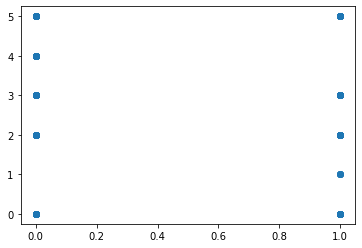

In [73]:
plt.scatter(df['class'],df['cap-shape'])

In [74]:
df

class  cap-shape cap-surface  cap-color  bruises  odor  gill-attachment  \
0         1          5           s          4        1     6                1   
1         0          5           s          9        1     0                1   
2         0          0           s          8        1     3                1   
3         1          5           y          8        1     6                1   
4         0          5           s          3        0     5                1   
5         0          5           y          9        1     0                1   
6         0          0           s          8        1     0                1   
7         0          0           y          8        1     3                1   
8         1          5           y          8        1     6                1   
9         0          0           s          9        1     0                1   
10        0          5           y          9        1     3                1   
11        0          5           y          9        1     0                1   
12        0          0           s          9        1     0                1   
13        1          5           y          8        1     6                1   
14        0          5           f          4        0     5                1   
15        0          4           f          3        0     5                1   
16        0          2           f          8        0     5                1   
17        1          5           s          4        1     6                1   
18        1          5           y          8        1     6                1   
19        1          5           s          4        1     6                1   
20        0          0           s          9        1     0                1   
21        1          5           y          4        1     6                1   
22        0          0           y          9        1     3                1   
23        0          0           y          8        1     0                1   
24        0          0           s          8        1     3                1   
25        1          2           s          8        1     6                1   
26        0          5           y          9        1     0                1   
27        0          5           y          8        1     3                1   
28        0          2           f          4        0     5                1   
29        0          5           s          9        1     0                1   
30        0          0           s          9        1     3                1   
31        1          5           y          8        1     6                1   
32        0          5           y          9        1     3                1   
33        0          5           y          4        1     3                1   
34        0          0           y          9        1     3                1   
35        0          5           f          9        1     3                1   
36        0          4           f          3        0     5                1   
37        1          5           y          4        1     6                1   
38        0          5           f          9        1     0                1   
39        0          0           s          9        1     3                1   
40        0          0           y          9        1     0                1   
41        0          5           y          9        1     3                1   
42        0          5           f          4        0     5                1   
43        1          5           y          8        1     6                1   
44        0          5           s          9        1     0                1   
45        0          5           y          8        1     0                1   
46        0          5           y          9        1     3                1   
47        0          5           s          8        1     3                1   
48        0          5           y   

In [76]:
x=df.drop(['class','spore-print-color','cap-surface','population','veil-type','stalk-color-below-ring','stalk-color-above-ring','stalk-surface-above-ring','stalk-surface-below-ring','stalk-root','stalk-shape','gill-size'],axis=1)

In [77]:
y=df[['class']]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [97]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
y_pred=dt.predict(x_test)

In [99]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
accuracy_score(y_pred,y_test)

0.9815422477440525

In [102]:
dt.score(x_train,y_train)

0.9868097080548716

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

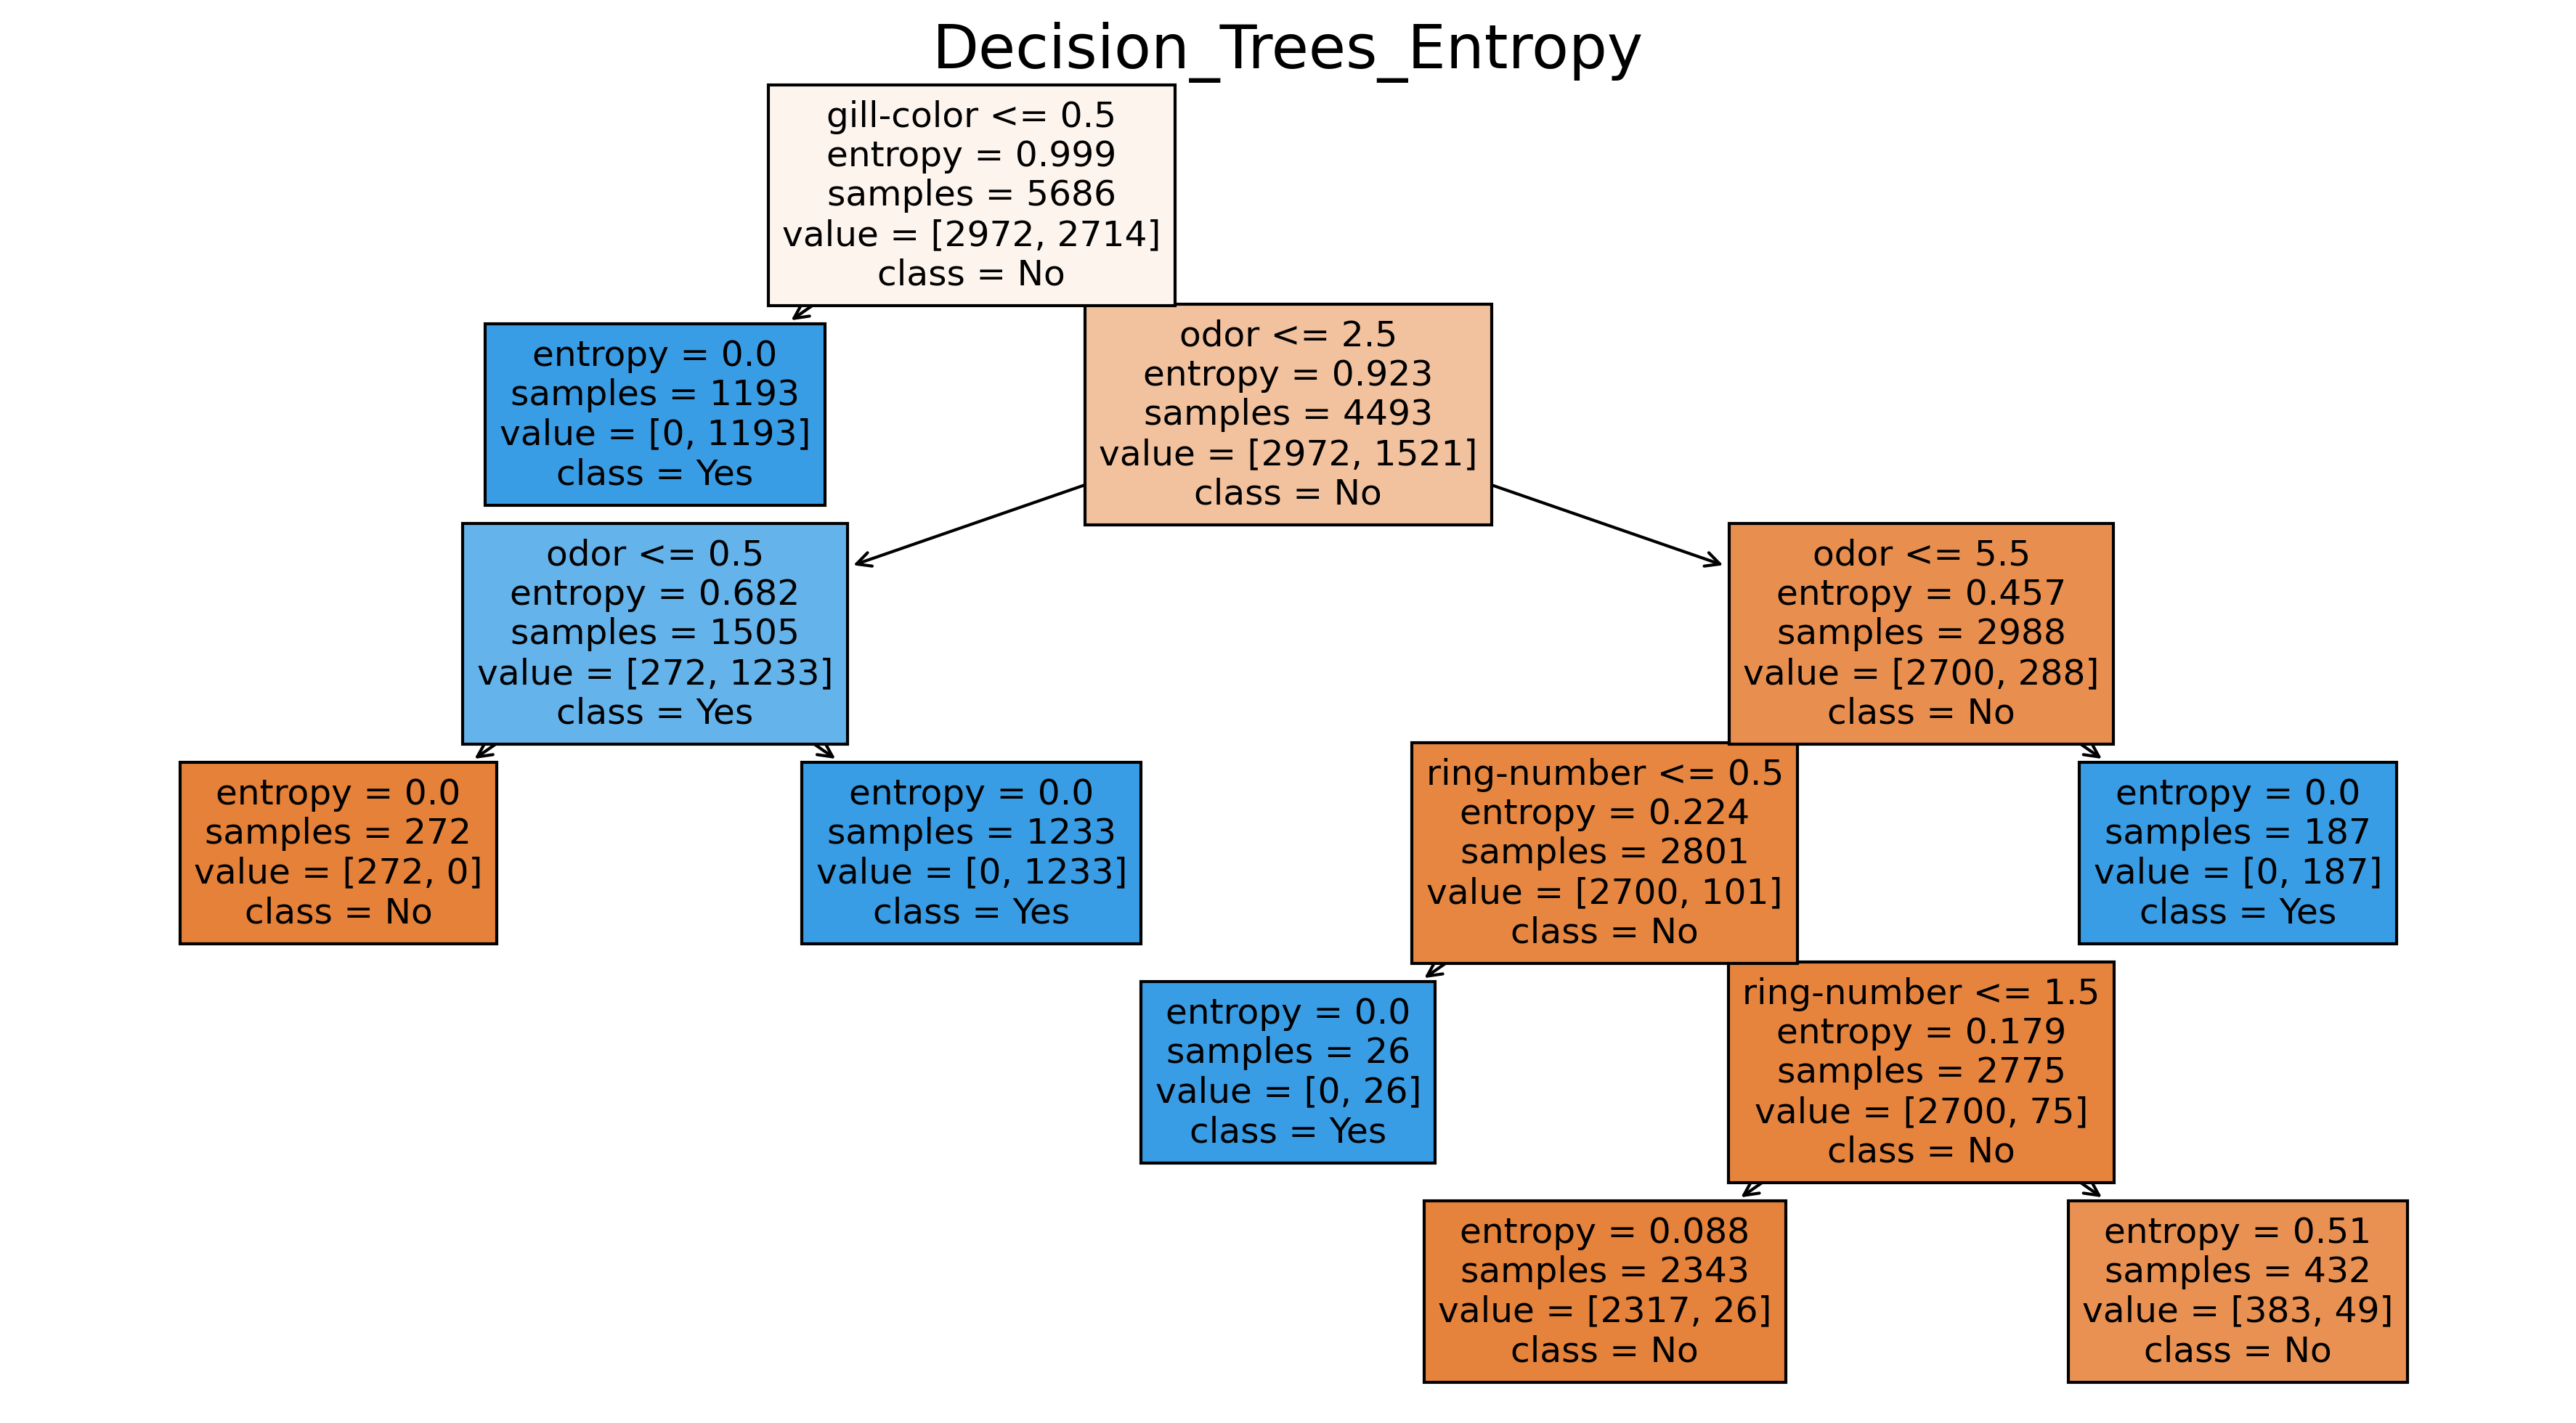

In [106]:
fn = list(x_train)
cn = ['No','Yes']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8),dpi=300)
plot_tree(dt,feature_names=fn,class_names=cn,filled=True);
plt.title('Decision_Trees_Entropy',fontsize=20);